In [87]:
import pandas as pd
from sklearn.decomposition import PCA
import os
import utilsCM

In [88]:
# Load Word2Vec
filename = 'ThingsWrd2Vec_subset.txt'
filepath = '../../../data-10/'
Wrd2Vec = pd.read_csv(filepath + filename,sep=',',index_col = 0)

# Running PCA Analysis to Compare Word2Sense and Word2Vec

In [89]:
from pandas import DataFrame as pddf

pca_W2Vec = PCA(n_components=125)
pca_W2Vec.fit(Wrd2Vec)

PCA(copy=True, iterated_power='auto', n_components=125, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [90]:
pathtofile = '../../../data-07/'
W2S_subset = pd.read_csv(pathtofile + "ThingsWrd2Sns_subset.txt", sep=",",index_col = 0)

In [91]:
pca_W2S = PCA(n_components=125)
pca_W2S.fit(W2S_subset)

PCA(copy=True, iterated_power='auto', n_components=125, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [92]:
pca_ratio = {}
pca_ratio['W2Sense']= []
pca_ratio['W2Vec']= []
pca_ratio['W2Sense']= pca_W2S.explained_variance_ratio_
pca_ratio['W2Vec']= pca_W2Vec.explained_variance_ratio_
pca_ratio_pd = pddf.from_dict(pca_ratio)

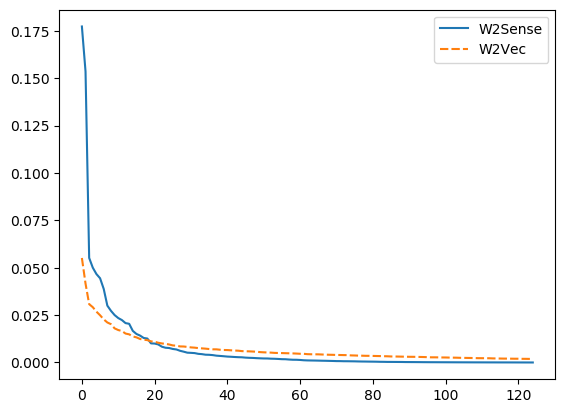

In [93]:
import seaborn as sns
sns.lineplot(data= pca_ratio_pd)

# Looking into Predictions for Word2Vec

In [94]:
import numpy as np
Ypredict = 'Word2Sense'

if Ypredict is 'Word2Vec':
    ### Load Word2Vec subset
    filename = 'ThingsWrd2Vec_subset.txt'
    filepath = '../../../data-10/'
    Wrd2Vec = pd.read_csv(filepath + filename,sep=',',index_col = 0)
    Y_embeddings_subset = Wrd2Vec.values[:,:].astype(np.float)
elif Ypredict is 'Word2Sense':
    ### Load Word2Sense subset
    pathtofile = '../../../data-07/'
    Y_embeddings_subset = pd.read_csv(pathtofile + "ThingsWrd2Sns_subset.txt", sep=",",index_col = 0)
    Y_embeddings_subset = Y_embeddings_subset.values[:,:].astype(np.float)

In [95]:
layer =  {'conv_5'}
Sub = [1,2,3,4]
ROI = {'EVC','LOC','PPA'}
pretrained_val = False
keyword = {'DNNActvtn','ROIpred'}

datapath = '../../../data-00/'
savepath = '../../../data-11/'

In [96]:
WIpath = '../../../data-04/'
nsample = 12
WrdThingsInfo = pd.read_csv(WIpath + 'KeptTHINGSInfo_n' + str(nsample) +'.csv',sep=',',index_col = 0)

In [98]:

Keepncomps = list(range(4,44,4))


for ikeyword in keyword:
    for ilayer in layer:
        
        if ikeyword is 'ROIpred':
            
            for iROI in ROI: 
                predictor_variable = {}
                for iSub in Sub:
                    Subfile = datapath +  "ROIpred_Sub" + str(iSub) + '_' + iROI + "_" + ilayer 
                    if not pretrained_val:
                        Subfile = Subfile + '_untrained'
                    
                    thisSub = np.load(Subfile + '.npy')
                            
                    #load ROIpred as predictor variable
                    if iSub is 1:
                        predictor_variable = thisSub
                    else:
                        predictor_variable = np.append( predictor_variable , thisSub, axis = 1)
                    
                predictor_variable_sub = predictor_variable[WrdThingsInfo['old_index']]
                    

                for icomps in Keepncomps:
                    filename = 'Predict' + Ypredict + '_' + ikeyword + '_' +iROI + '_'+ ilayer + '_'+ str(icomps) +'PCs'

                    if not pretrained_val:
                        filename = filename+'_untrained'
                        
                    if not os.path.isfile(savepath + filename + '.npy'):
                        mean_r = utilsCM.iter_cvregress(predictor_variable_sub,Y_embeddings_subset,ikeyword,ilayer,icomps,iROI,savefolder = savepath, Ypredict=Ypredict,pretrained = pretrained_val)
#                     utilsCM.make_figure(mean_r,ikeyword,ilayer,icomps,iROI, figurepath = 'figures-05/')
#                     print(mean_r)
        
        
        elif ikeyword is 'DNNActvtn':
            predictor_variable_file = datapath +  "things_" + ilayer 
            if not pretrained_val:
                predictor_variable_file = predictor_variable_file + '_untrained'
            
            predictor_variable = pd.read_csv(predictor_variable_file + '.csv', header=None, index_col=0).iloc[:,:].to_numpy()            
            predictor_variable_sub = predictor_variable[WrdThingsInfo['old_index']]

            for icomps in Keepncomps:
                filename = 'Predict' + Ypredict + '_'  + ikeyword + '_'+ ilayer + '_'+ str(icomps) +'PCs'
                
                if not pretrained_val:
                    filename = filename +'_untrained'
                                            
                if not os.path.isfile(savepath + filename + '.npy'):
                    mean_r = utilsCM.iter_cvregress(predictor_variable_sub,Y_embeddings_subset,ikeyword,ilayer,icomps,savefolder = savepath, Ypredict=Ypredict, pretrained = pretrained_val)
                
#                 utilsCM.make_figure(mean_r,ikeyword,ilayer,icomps, figurepath = 'figures-05/')

k-fold regression, independet variable: 4 PCs retained of DNNActvtn from conv_5
k-fold regression, independet variable: 8 PCs retained of DNNActvtn from conv_5
k-fold regression, independet variable: 12 PCs retained of DNNActvtn from conv_5
k-fold regression, independet variable: 16 PCs retained of DNNActvtn from conv_5
k-fold regression, independet variable: 20 PCs retained of DNNActvtn from conv_5
k-fold regression, independet variable: 24 PCs retained of DNNActvtn from conv_5
k-fold regression, independet variable: 28 PCs retained of DNNActvtn from conv_5
k-fold regression, independet variable: 32 PCs retained of DNNActvtn from conv_5
k-fold regression, independet variable: 36 PCs retained of DNNActvtn from conv_5
k-fold regression, independet variable: 40 PCs retained of DNNActvtn from conv_5
k-fold regression, independet variable: 4 PCs retained of ROIpred from EVC
k-fold regression, independet variable: 8 PCs retained of ROIpred from EVC
k-fold regression, independet variable: 12

In [99]:
tresh_bonf = utilsCM.p2r(.05/Y_embeddings_subset.shape[1], Y_embeddings_subset.shape[0])
figurepath='../../../figures-11/'

ROI = {'EVC','LOC','PPA'}
keyword = {'DNNActvtn','ROIpred'}
Keepncomps = list(range(4,44,4))
pretrained_val = True

In [102]:
from  matplotlib import pyplot
import seaborn as sns
from pandas import DataFrame as pddf

savepath = '../../../data-11/'
figurepath = '../../../figures-11/'
layer = {'conv_5'}
pretrained_vec = [True, False]
##Showing histograms for senses above threshold

myDict_count = {}
myDict_mean = {}
myDict_max = {}
myDict_median = {}


for ilayer in layer:
    for pretrained_val in pretrained_vec:
        for ikeyword in keyword:            
            for icomps in Keepncomps:
                thisPrediction = []
                
                if ikeyword is 'DNNActvtn':

                    filename = 'Predict' + Ypredict + '_' + ikeyword + '_'+ ilayer + '_'+ str(icomps) +'PCs'
                    DictKey = ikeyword

                    if not pretrained_val:
                        filename = filename + '_untrained'
                        DictKey = DictKey + '_untrained'
        
                    if DictKey not in myDict_count:
                        myDict_count[DictKey] = []
                        myDict_mean[DictKey] = []
                        myDict_max[DictKey] = []
                        myDict_median[DictKey] = []
                        
                    thisPrediction = np.load(savepath + filename + '.npy')
                    pred_thresh = thisPrediction[thisPrediction>tresh_bonf]
                    myDict_count[DictKey].append(pred_thresh.shape[0])
                    myDict_mean[DictKey].append(pred_thresh.mean())
                    myDict_max[DictKey].append(pred_thresh.max())
                    myDict_median[DictKey].append(np.median(pred_thresh))
                    utilsCM.make_figure(pred_thresh,ikeyword,ilayer,icomps,figure_size=(50,20),figure_path = figurepath, Ypredict=Ypredict,font_size=40,pretrained = pretrained_val)
                    
            
                elif ikeyword is 'ROIpred':
                
                    for iROI in ROI:
                        filename = 'Predict' + Ypredict + '_' + ikeyword + '_' +iROI + '_'+ ilayer + '_'+ str(icomps) +'PCs'
                        DictKey = iROI
                        if not pretrained_val:
                            filename = filename +'_untrained'
                            DictKey = DictKey + '_untrained'

                        if DictKey not in myDict_count:
                            myDict_count[DictKey] = []
                            myDict_mean[DictKey] = []
                            myDict_max[DictKey] = []
                            myDict_median[DictKey] = []
                        
                        thisPrediction = np.load(savepath + filename + '.npy')
                        pred_thresh = thisPrediction[thisPrediction>tresh_bonf]
                        myDict_count[DictKey].append(pred_thresh.shape[0])
                        myDict_mean[DictKey].append(pred_thresh.mean())
                        myDict_max[DictKey].append(pred_thresh.max())
                        myDict_median[DictKey].append(np.median(pred_thresh))
                        utilsCM.make_figure(pred_thresh,ikeyword,ilayer,icomps,iROI,figure_size=(50,20),figure_path = figurepath, Ypredict=Ypredict,font_size=40,pretrained = pretrained_val)
                        
                        
        
    myDict_count['PCs'] = []
    myDict_mean['PCs'] = []
    myDict_max['PCs'] = []
    myDict_median['PCs'] = []
    myDict_count['Metric'] = []
    myDict_mean['Metric'] = []
    myDict_max['Metric'] = []
    myDict_median['Metric'] = []
    for i in Keepncomps:
        myDict_count['PCs'].append(i)
        myDict_mean['PCs'].append(i)
        myDict_max['PCs'].append(i)
        myDict_median['PCs'].append(i)
        myDict_count['Metric'].append('count')
        myDict_mean['Metric'].append('mean')
        myDict_max['Metric'].append('max')
        myDict_median['Metric'].append('median')

In [103]:
df_count = pddf.from_dict(myDict_count).set_index('PCs')
df_mean = pddf.from_dict(myDict_mean).set_index('PCs')
df_max = pddf.from_dict(myDict_max).set_index('PCs')
df_median = pddf.from_dict(myDict_median).set_index('PCs')

In [104]:
allvalues = pd.concat([df_count, df_mean,df_max,df_median], axis=0)

In [111]:
thisPrediction.shape

(125,)

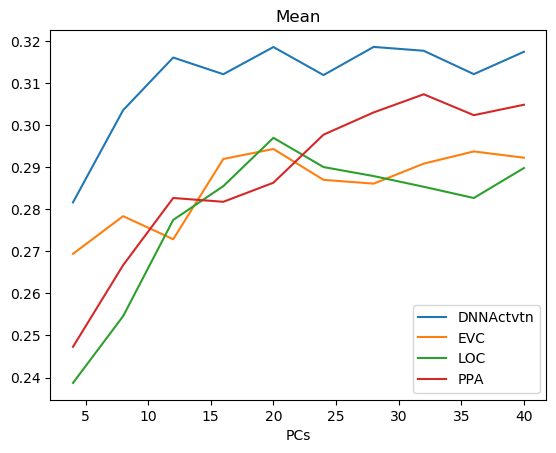

In [113]:
import matplotlib.pyplot as plt

sns.lineplot(data= allvalues[allvalues['Metric'] == 'mean'].iloc[:,0:4], dashes=False).set_title('Mean')
plt.legend(loc='lower right')
plt.savefig(figurepath + "Mean.png")

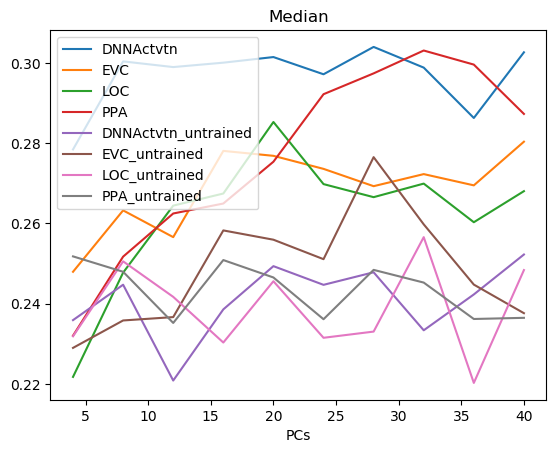

In [107]:
sns.lineplot(data= allvalues[allvalues['Metric'] == 'median'].iloc[:,0:8], dashes=False).set_title('Median')
plt.savefig(figurepath + "Median.png")

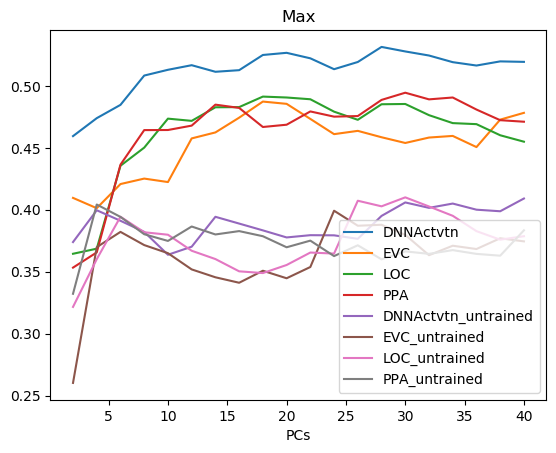

In [57]:
sns.lineplot(data= allvalues[allvalues['Metric'] == 'max'].iloc[:,0:8], dashes=False).set_title('Max')
plt.savefig(figurepath + "Max.png")

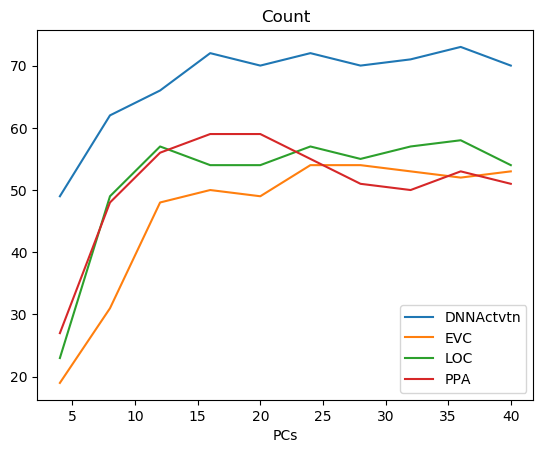

In [114]:
sns.lineplot(data= allvalues[allvalues['Metric'] == 'count'].iloc[:,0:4], dashes=False).set_title('Count')
plt.legend(loc='lower right')
plt.savefig(figurepath + "Count.png")



In [39]:
for ikeyword in keyword:
    for ilayer in layer:
        
        if ikeyword is 'ROIpred':
            
            for iROI in ROI: 
                predictor_variable = {}
                for iSub in Sub:
                    Subfile = datapath +  "ROIpred_Sub" + str(iSub) + '_' + iROI + "_" + ilayer 
                    if not pretrained_val:
                        Subfile = Subfile + '_untrained'
                    
                    thisSub = np.load(Subfile + '.npy')
                            
                    #load ROIpred as predictor variable
                    if iSub is 1:
                        predictor_variable = thisSub
                    else:
                        predictor_variable = np.append( predictor_variable , thisSub, axis = 1)
                    
                predictor_variable_sub = predictor_variable[WrdThingsInfo['old_index']]
                pca_ROI = PCA(n_components=60)
                pca_ROI.fit(predictor_variable_sub)
                    